Pandas is a Python library used for working with data sets.
It has functions for analyzing, cleaning, exploring, and manipulating data.
The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" and was created by Wes McKinney in 2008.

In [1]:
import pandas as pd

Loading the dataset

In [2]:
df=pd.read_csv("crop_data_final.csv")

In [3]:
##Displaying the top 5 records of the data set
df.head()

Crop  Year Province  Seeded Area  Harvested Area  Yield  Production
0  Winter Wheat  2014  Alberta         72.8            62.7    4.6       288.5
1  Winter Wheat  2015  Alberta         85.0            74.9    4.0       296.1
2  Winter Wheat  2016  Alberta         72.8            64.7    3.5       225.9
3  Winter Wheat  2017  Alberta         78.5            72.4    4.4       318.4
4  Winter Wheat  2018  Alberta         52.6            42.5    4.2       176.9

In [4]:
##Let's check if we have any missing values
## Displaying the shape
df.shape

(2490, 7)

In [5]:
## Displaying the type of each feature
df.dtypes

Crop               object
Year                int64
Province           object
Seeded Area       float64
Harvested Area    float64
Yield             float64
Production        float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Crop            2490 non-null   object 
 1   Year            2490 non-null   int64  
 2   Province        2490 non-null   object 
 3   Seeded Area     2490 non-null   float64
 4   Harvested Area  2490 non-null   float64
 5   Yield           2490 non-null   float64
 6   Production      2490 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 136.3+ KB


In [7]:
##checking for null values
df.isnull().sum()

Crop              0
Year              0
Province          0
Seeded Area       0
Harvested Area    0
Yield             0
Production        0
dtype: int64

In [9]:
#Checking for zeros in numerical columns

# Defining numerical columns
numerical_columns = ['Seeded Area', 'Harvested Area', 'Yield', 'Production']

# Checking for zeros in numerical columns
zeros_mask = df[numerical_columns] == 0

# Count zeros in each column
zeros_count = zeros_mask.sum()

print("Zeros count in each numerical column:")
print(zeros_count)


Zeros count in each numerical column:
Seeded Area       1271
Harvested Area    1307
Yield             1310
Production        1310
dtype: int64


In [10]:
#Distribution of zeros
numerical_columns = ['Seeded Area', 'Harvested Area', 'Yield', 'Production']

# Calculate the proportion of zeros in each numerical column
zeros_distribution = (df[numerical_columns] == 0).mean()

print("Distribution of zeros in each numerical column:")
print(zeros_distribution)

Distribution of zeros in each numerical column:
Seeded Area       0.510442
Harvested Area    0.524900
Yield             0.526104
Production        0.526104
dtype: float64


In [11]:
df['Province'].unique()

array(['Alberta', 'Quebec', 'Prince Edward Island',
       'Newfoundland and Labrador', 'British Columbia', 'Saskatchewan',
       'New Brunswick', 'Manitoba', 'Ontario', 'Nova Scotia'],
      dtype=object)

In [12]:
df['Year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int64)

In [13]:
df['Crop'].unique()

array(['Winter Wheat', 'Spring Wheat', 'CW Red Spring',
       'Canada Prairie Spring', 'Northern Hard Red', 'CW Extra Strong',
       'CW Soft White Spring', 'Other Spring Wheat', 'Durum', 'Oats',
       'Barley', 'Rye', 'Mixed Grains', 'Corn', 'Flaxseed', 'Canola',
       'Soybeans', 'Dry Peas', 'Dry White Beans', 'Coloured Beans',
       'Lentils', 'Chickpeas', 'Mustard Seed', 'Sunflower Seed',
       'Canary Seed', 'Special Crops'], dtype=object)

In [15]:
df1=df.copy()

In [16]:
df1.head()

Crop  Year Province  Seeded Area  Harvested Area  Yield  Production
0  Winter Wheat  2014  Alberta         72.8            62.7    4.6       288.5
1  Winter Wheat  2015  Alberta         85.0            74.9    4.0       296.1
2  Winter Wheat  2016  Alberta         72.8            64.7    3.5       225.9
3  Winter Wheat  2017  Alberta         78.5            72.4    4.4       318.4
4  Winter Wheat  2018  Alberta         52.6            42.5    4.2       176.9

In [18]:
##Outlier detection
from scipy.stats import zscore

In [20]:
numerical_columns = ['Seeded Area', 'Harvested Area', 'Yield', 'Production']

# Calculate z-scores for each numerical column
z_scores = df[numerical_columns].apply(zscore)

# Threshold for considering a data point as an outlier
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Print the number of outliers in each column
print("Number of outliers in each numerical column:")
print(outliers.sum())

Number of outliers in each numerical column:
Seeded Area       68
Harvested Area    67
Yield             58
Production        75
dtype: int64


In [21]:
# Define numerical columns
numerical_columns = ['Seeded Area', 'Harvested Area', 'Yield', 'Production']

# Calculate z-scores for each numerical column
z_scores = df[numerical_columns].apply(zscore)

# Threshold for considering a data point as an outlier
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Filter the dataset to show only outliers
outlier_df = df[outliers.any(axis=1)]

# Print the outlier data
print("Outlier data:")
print(outlier_df)

Outlier data:
              Crop  Year     Province  Seeded Area  Harvested Area  Yield  \
10    Spring Wheat  2014      Alberta       2606.2          2586.0    3.9   
11    Spring Wheat  2015      Alberta       2466.6          2422.1    3.5   
12    Spring Wheat  2016      Alberta       2391.7          2298.6    3.2   
13    Spring Wheat  2017      Alberta       2318.3          2074.0    4.0   
14    Spring Wheat  2018      Alberta       2371.5          2337.0    3.7   
...            ...   ...          ...          ...             ...    ...   
2362          Corn  2016  Nova Scotia          8.1             7.9    7.9   
2363          Corn  2017  Nova Scotia          8.1             7.7    7.7   
2364          Corn  2018  Nova Scotia          7.5             7.3    8.4   
2365          Corn  2019  Nova Scotia          9.3             8.7    8.0   
2368          Corn  2022  Nova Scotia          6.5             6.5    8.6   

      Production  
10       10169.6  
11        8369.1  
12  

In [22]:
# Define the numerical column of interest
column_of_interest = 'Production'

# Calculate z-scores for the 'Production' column
z_scores = zscore(df[column_of_interest])

# Threshold for considering a data point as an outlier
threshold = 3

# Identify outliers in the 'Production' column
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Filter the dataset to show only outliers in the 'Production' column
production_outliers_df = df[outliers]

# Print the outlier data related to 'Production'
print("Outliers related to 'Production':")
print(production_outliers_df)

Outliers related to 'Production':
              Crop  Year Province  Seeded Area  Harvested Area  Yield  \
10    Spring Wheat  2014  Alberta       2606.2          2586.0    3.9   
11    Spring Wheat  2015  Alberta       2466.6          2422.1    3.5   
12    Spring Wheat  2016  Alberta       2391.7          2298.6    3.2   
13    Spring Wheat  2017  Alberta       2318.3          2074.0    4.0   
14    Spring Wheat  2018  Alberta       2371.5          2337.0    3.7   
...            ...   ...      ...          ...             ...    ...   
2105          Corn  2019  Ontario        872.1           841.7   10.4   
2106          Corn  2020  Ontario        891.3           869.1    9.9   
2107          Corn  2021  Ontario        886.7           866.0   10.3   
2108          Corn  2022  Ontario        891.3           884.1   11.0   
2109          Corn  2023  Ontario        921.1           906.3   10.4   

      Production  
10       10169.6  
11        8369.1  
12        7247.6  
13        820

Data Visuvalization

In [23]:
# Set pandas display options to show more rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Now, print the outlier data related to 'Production'
print("Outliers related to 'Production':")
print(production_outliers_df)

Outliers related to 'Production':
               Crop  Year      Province  Seeded Area  Harvested Area  Yield  \
10     Spring Wheat  2014       Alberta       2606.2          2586.0    3.9   
11     Spring Wheat  2015       Alberta       2466.6          2422.1    3.5   
12     Spring Wheat  2016       Alberta       2391.7          2298.6    3.2   
13     Spring Wheat  2017       Alberta       2318.3          2074.0    4.0   
14     Spring Wheat  2018       Alberta       2371.5          2337.0    3.7   
15     Spring Wheat  2019       Alberta       2535.2          2491.3    3.5   
16     Spring Wheat  2020       Alberta       2665.9          2585.5    3.7   
17     Spring Wheat  2021       Alberta       2555.2          2502.2    3.8   
18     Spring Wheat  2022       Alberta       2310.7          2265.0    2.5   
19     Spring Wheat  2023       Alberta       2588.3          2550.9    3.9   
20    CW Red Spring  2014       Alberta       2155.0          2138.8    3.7   
21    CW Red Sprin

Our targetted column is "production". So we checked for outliers in it. But when we checked these records with threshold as 3 to check the outlier in this column we found that the production is high because of harvested and yield columns and they are not considered as outliers.

In [25]:
import seaborn as sns

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

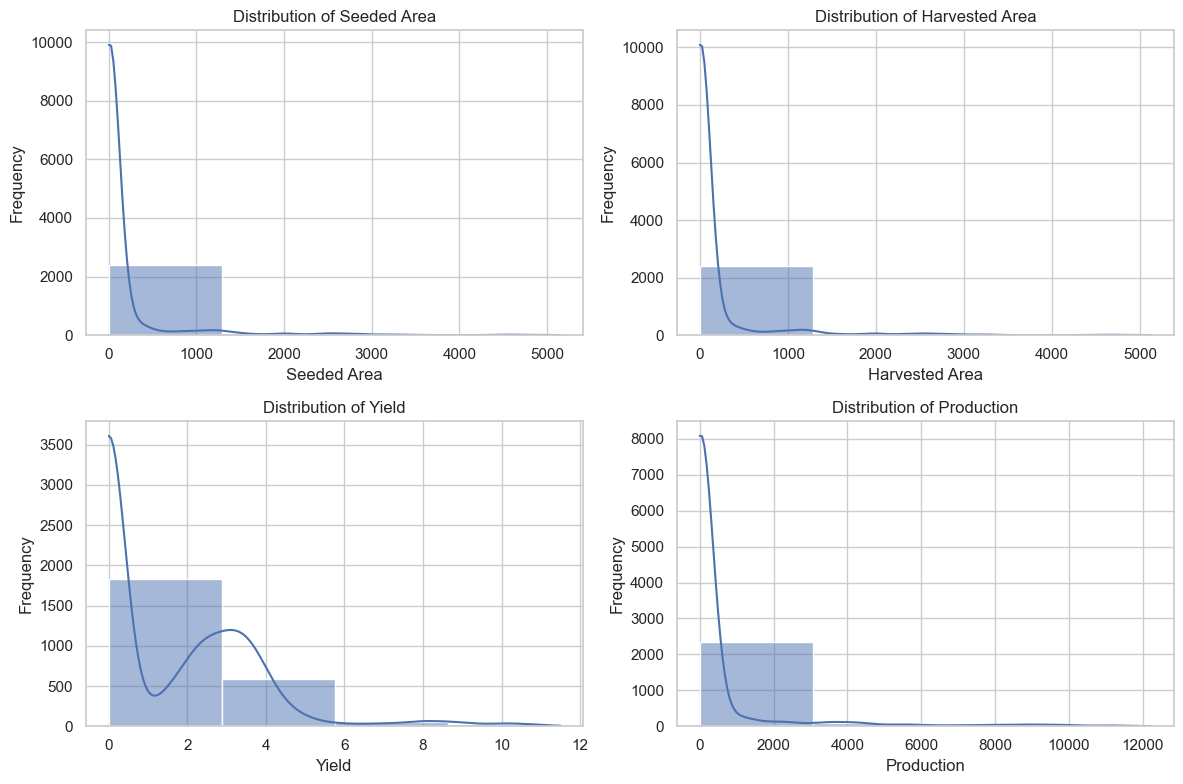

In [27]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plot distributions of numeric columns
numeric_cols = ['Seeded Area', 'Harvested Area', 'Yield', 'Production']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=4, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Above four histograms, each showing the distribution of one of the numeric columns in our dataset.
The histograms will visualize how the data is spread out and provide insights into its central tendency and variability.

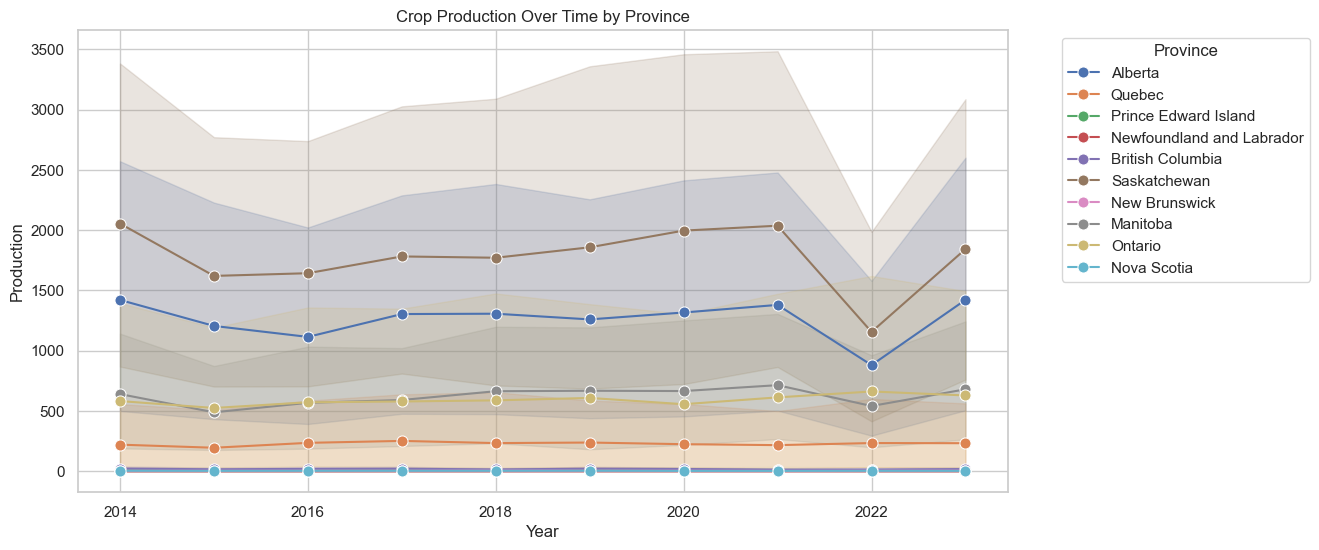

In [28]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plot trends over time for Production
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Production', hue='Province', marker='o', markersize=8)
plt.title('Crop Production Over Time by Province')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

we're creating a line plot where the x-axis represents the years, the y-axis represents the production of crops, and each line represents a province. This allows us to see how crop production has changed over time for each province.

Bargraph for province wise overall production

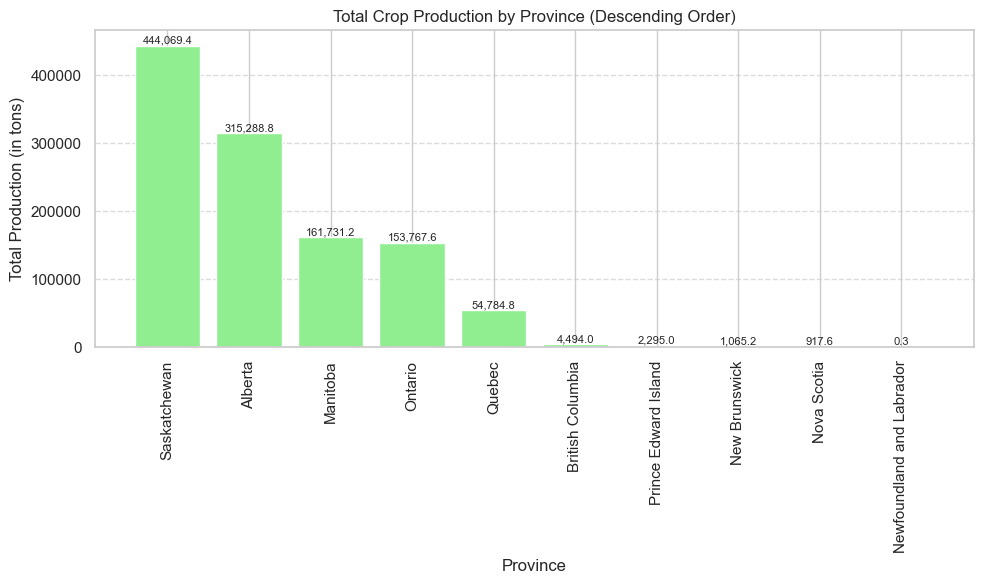

In [29]:
# Grouping by Province and summing up the Production
province_production = df.groupby('Province')['Production'].sum()

# Sorting the values in descending order
province_production_sorted = province_production.sort_values(ascending=False)

# Plotting the bar graph with a different color
plt.figure(figsize=(10, 6))
bars = plt.bar(province_production_sorted.index, province_production_sorted, color='lightgreen')

# Adding total production values on top of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f"{province_production_sorted.iloc[i]:,.1f}", ha='center', va='bottom', fontsize=8)

plt.title('Total Crop Production by Province (Descending Order)')
plt.xlabel('Province')
plt.ylabel('Total Production (in tons)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Let's check individual crop production of top 5 provinces from the above barchart over the decade

1. Overall crop production in Alberta Province over the decade

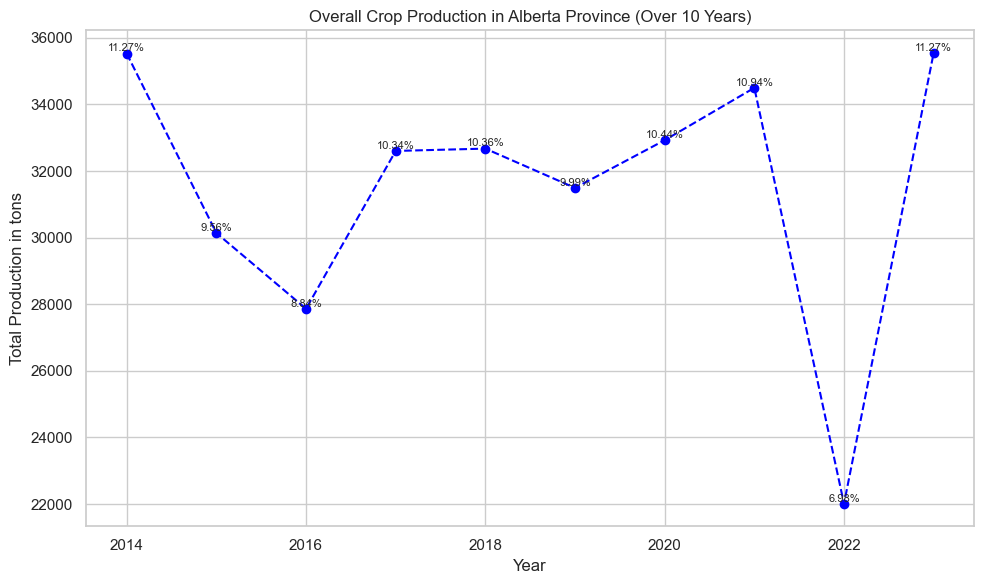

In [33]:
# Filter data for Alberta province
alberta_data = df[df['Province'] == 'Alberta']

# Grouping by Year and summing up the Production
alberta_production_by_year = alberta_data.groupby('Year')['Production'].sum()

# Calculate the total production over 10 years
total_production_10_years = alberta_production_by_year.sum()

# Calculate the percentage of production for each year in the overall production
percentage_of_production = (alberta_production_by_year / total_production_10_years) * 100

# Plotting the line chart for total crop production in Alberta province
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(alberta_production_by_year.index, alberta_production_by_year, marker='o', color='blue', linestyle='--')

# Annotate data points with percentage of production in the overall production over 10 years
for year, production, percentage in zip(alberta_production_by_year.index, alberta_production_by_year, percentage_of_production):
    plt.text(year, production + 5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Overall Crop Production in Alberta Province (Over 10 Years)')
plt.xlabel('Year')
plt.ylabel('Total Production in tons')
plt.grid(True)
plt.tight_layout()
plt.show()

2. Overall crop production in Quebec Province over the decade

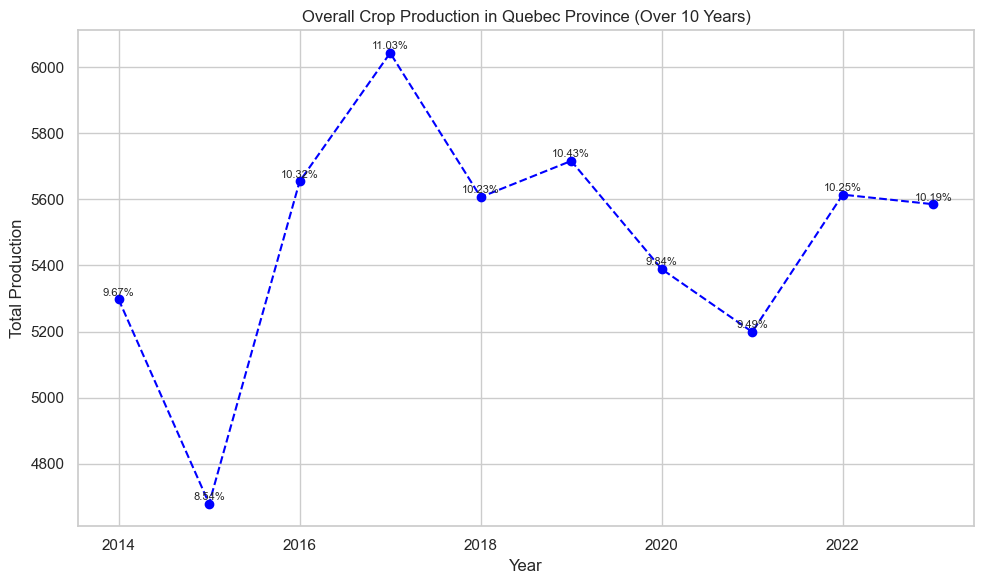

In [34]:
# Filter data for Quebec province
quebec_data = df[df['Province'] == 'Quebec']

# Grouping by Year and summing up the Production
quebec_production_by_year = quebec_data.groupby('Year')['Production'].sum()

# Calculate the total production over 10 years
total_production_10_years = quebec_production_by_year.sum()

# Calculate the percentage of production for each year in the overall production
percentage_of_production = (quebec_production_by_year / total_production_10_years) * 100

# Plotting the line chart for total crop production in Quebec province
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(quebec_production_by_year.index, quebec_production_by_year, marker='o', color='blue', linestyle='--')

# Annotate data points with percentage of production in the overall production over 10 years
for year, production, percentage in zip(quebec_production_by_year.index, quebec_production_by_year, percentage_of_production):
    plt.text(year, production + 5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Overall Crop Production in Quebec Province (Over 10 Years)')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid(True)
plt.tight_layout()
plt.show()

3. Overall crop production in Manitoba Province over the decade

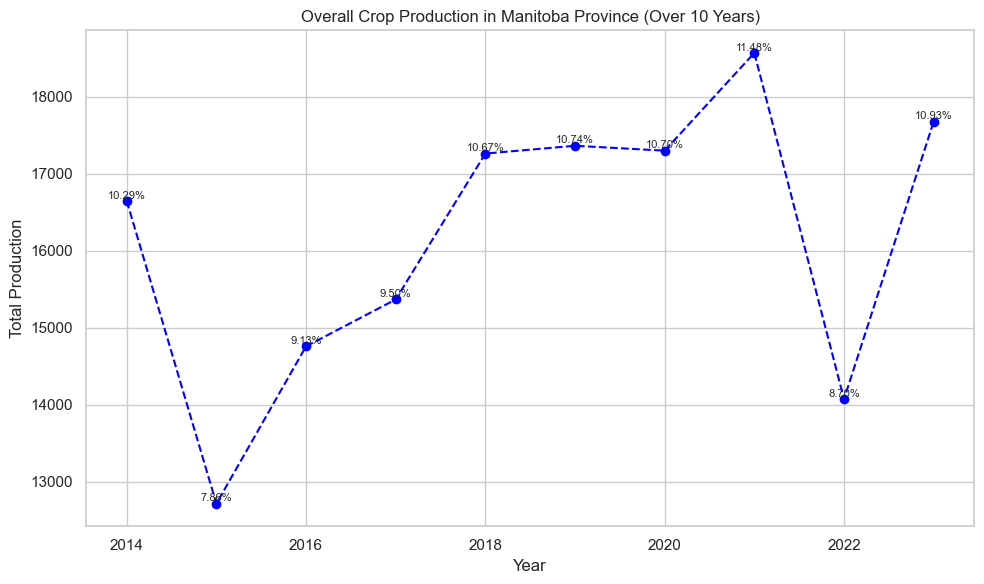

In [35]:
# Filter data for Manitoba province
manitoba_data = df[df['Province'] == 'Manitoba']

# Grouping by Year and summing up the Production
manitoba_production_by_year = manitoba_data.groupby('Year')['Production'].sum()

# Calculate the total production over 10 years
total_production_10_years = manitoba_production_by_year.sum()

# Calculate the percentage of production for each year in the overall production
percentage_of_production = (manitoba_production_by_year / total_production_10_years) * 100

# Plotting the line chart for total crop production in Manitoba province
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(manitoba_production_by_year.index, manitoba_production_by_year, marker='o', color='blue', linestyle='--')

# Annotate data points with percentage of production in the overall production over 10 years
for year, production, percentage in zip(manitoba_production_by_year.index, manitoba_production_by_year, percentage_of_production):
    plt.text(year, production + 5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Overall Crop Production in Manitoba Province (Over 10 Years)')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid(True)
plt.tight_layout()
plt.show()

4. Overall crop production in Ontario Province over the decade

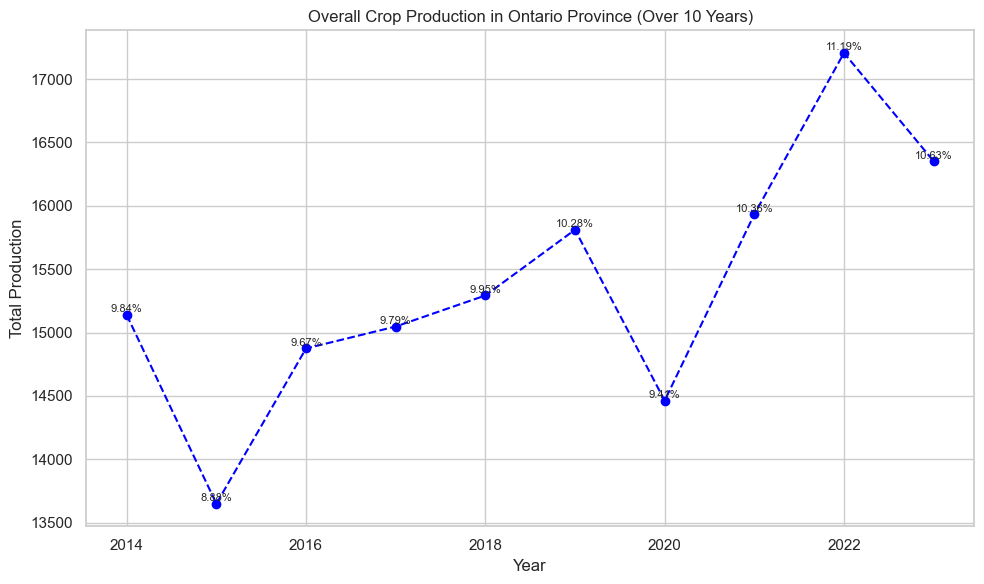

In [36]:
# Filter data for Ontario province
ontario_data = df[df['Province'] == 'Ontario']

# Grouping by Year and summing up the Production
ontario_production_by_year = ontario_data.groupby('Year')['Production'].sum()

# Calculate the total production over 10 years
total_production_10_years = ontario_production_by_year.sum()

# Calculate the percentage of production for each year in the overall production
percentage_of_production = (ontario_production_by_year / total_production_10_years) * 100

# Plotting the line chart for total crop production in Ontario province
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(ontario_production_by_year.index, ontario_production_by_year, marker='o', color='blue', linestyle='--')

# Annotate data points with percentage of production in the overall production over 10 years
for year, production, percentage in zip(ontario_production_by_year.index, ontario_production_by_year, percentage_of_production):
    plt.text(year, production + 5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Overall Crop Production in Ontario Province (Over 10 Years)')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid(True)
plt.tight_layout()
plt.show()

5. Overall crop production in Saskatchewan Province over the decade

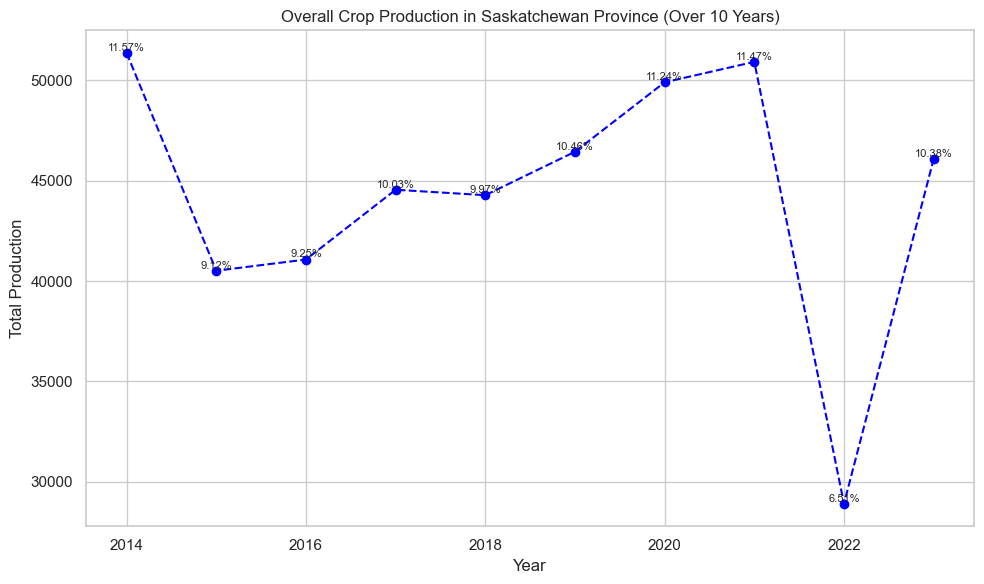

In [37]:
# Filter data for Saskatchewan province
saskatchewan_data = df[df['Province'] == 'Saskatchewan']

# Grouping by Year and summing up the Production
saskatchewan_production_by_year = saskatchewan_data.groupby('Year')['Production'].sum()

# Calculate the total production over 10 years
total_production_10_years = saskatchewan_production_by_year.sum()

# Calculate the percentage of production for each year in the overall production
percentage_of_production = (saskatchewan_production_by_year / total_production_10_years) * 100

# Plotting the line chart for total crop production in Saskatchewan province
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(saskatchewan_production_by_year.index, saskatchewan_production_by_year, marker='o', color='blue', linestyle='--')

# Annotate data points with percentage of production in the overall production over 10 years
for year, production, percentage in zip(saskatchewan_production_by_year.index, saskatchewan_production_by_year, percentage_of_production):
    plt.text(year, production + 5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Overall Crop Production in Saskatchewan Province (Over 10 Years)')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
df.head()

Crop  Year Province  Seeded Area  Harvested Area  Yield  Production
0  Winter Wheat  2014  Alberta         72.8            62.7    4.6       288.5
1  Winter Wheat  2015  Alberta         85.0            74.9    4.0       296.1
2  Winter Wheat  2016  Alberta         72.8            64.7    3.5       225.9
3  Winter Wheat  2017  Alberta         78.5            72.4    4.4       318.4
4  Winter Wheat  2018  Alberta         52.6            42.5    4.2       176.9

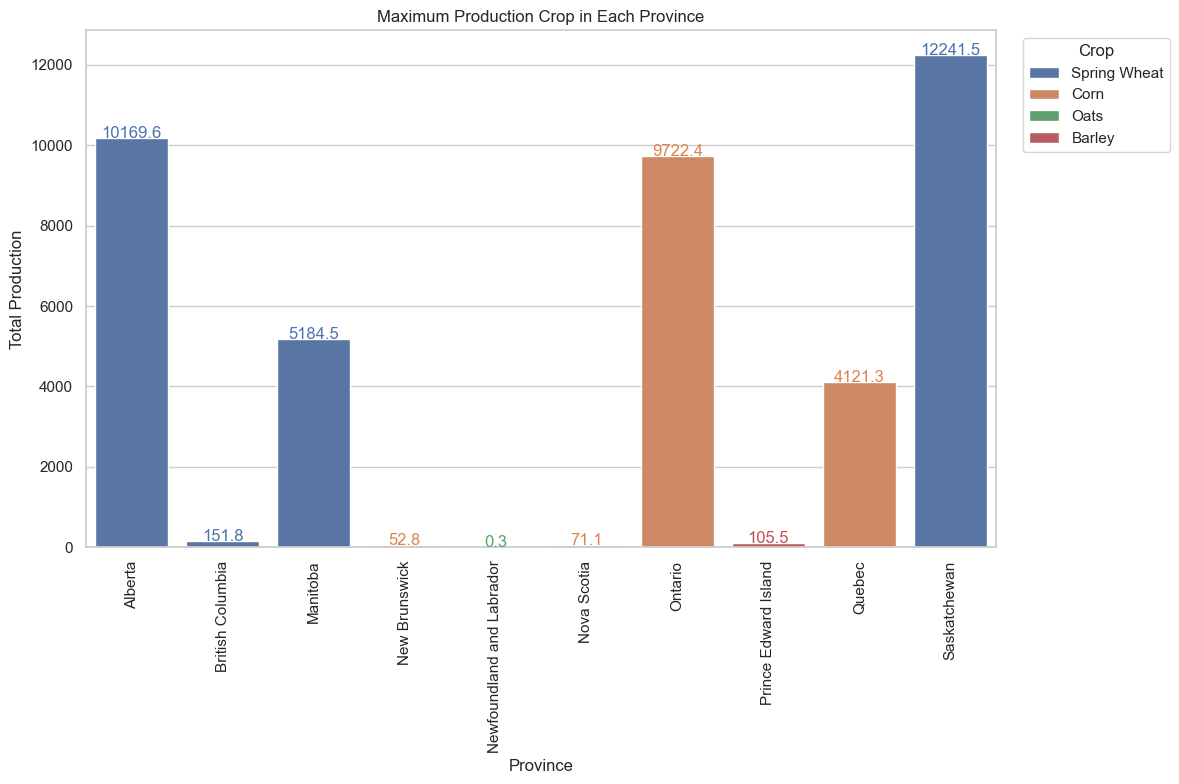

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by province and find the row with the maximum production within each group
max_production_crop_per_province_idx = df.groupby('Province')['Production'].idxmax()

# Retrieve the corresponding rows from the original DataFrame
max_production_crop_per_province = df.loc[max_production_crop_per_province_idx]

# Calculate the total production for each maximum production crop in each province
total_production_per_crop = max_production_crop_per_province.groupby(['Province', 'Crop'])['Production'].sum().reset_index()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a bar plot using Seaborn
sns.barplot(x='Province', y='Production', hue='Crop', data=total_production_per_crop)

# Annotate each bar with the total production value
for index, row in total_production_per_crop.iterrows():
    color = sns.color_palette()[list(total_production_per_crop['Crop'].unique()).index(row['Crop'])]
    plt.text(index, row['Production'], f'{row["Production"]:.1f}', color=color, ha='center')

# Set the title and labels
plt.title("Maximum Production Crop in Each Province")
plt.xlabel("Province")
plt.ylabel("Total Production")

# Set the legend at the top right and adjust legend colors
plt.legend(title='Crop', loc='upper right', bbox_to_anchor=(1.2, 1))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


In [58]:
agriculture_province_data=pd.read_csv("crop_data_final.csv")

In [63]:
crop_to_croptype = {
    'Winter Wheat': 'Wheat',
    'Spring Wheat': 'Wheat',
    'CW Red Spring': 'Wheat',
    'Canada Prairie Spring': 'Wheat',
    'Northern Hard Red': 'Wheat',
    'CW Extra Strong': 'Wheat',
    'CW Soft White Spring': 'Wheat',
    'Other Spring Wheat': 'Wheat',
    'Durum': 'Wheat',
    'Oats': 'Grains',
    'Barley': 'Grains',
    'Rye': 'Grains',
    'Mixed Grains': 'Grains',
    'Corn': 'Maize',
    'Flaxseed': 'Oilseeds',
    'Canola': 'Oilseeds',
    'Soybeans': 'Oilseeds',
    'Dry Peas': 'Pulses',
    'Dry White Beans': 'Pulses',
    'Coloured Beans': 'Pulses',
    'Lentils': 'Pulses',
    'Chickpeas': 'Pulses',
    'Mustard Seed': 'Oilseeds',
    'Sunflower Seed': 'Oilseeds',
    'Canary Seed': 'Seeds',
    'Special Crops': 'Special Crops'
}

# Map crops to their croptypes
agriculture_province_data['Croptype'] = df['Crop'].map(crop_to_croptype)


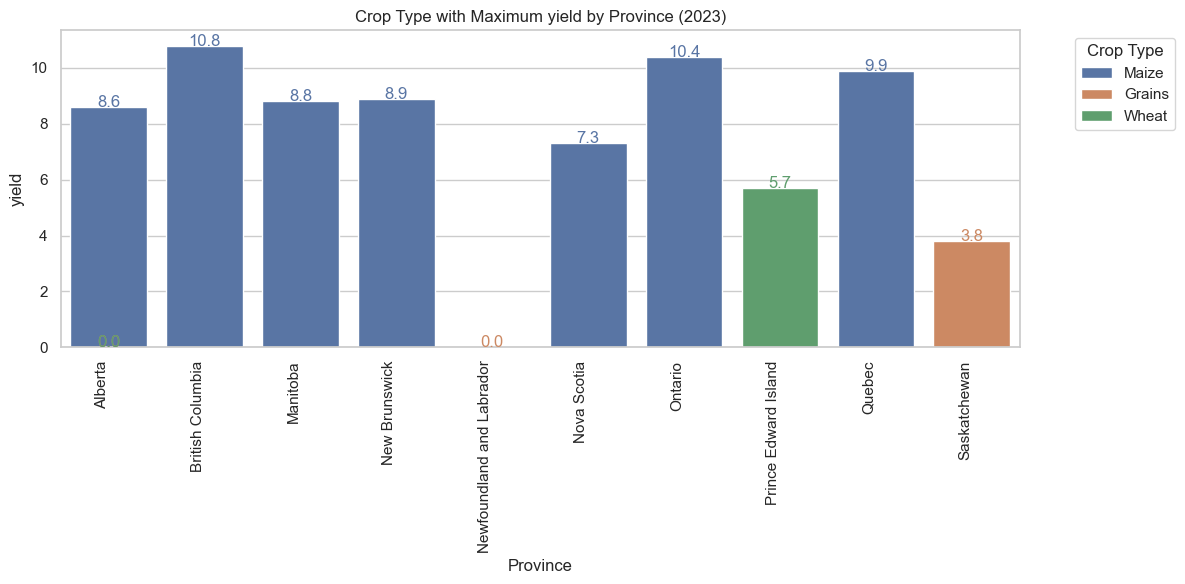

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Map crops to their crop types
agriculture_province_data['Croptype'] = agriculture_province_data['Crop'].map(crop_to_croptype)

# Filter the data for the year 2023
agriculture_2023 = agriculture_province_data[agriculture_province_data['Year'] == 2023]

# Group the data by province, croptype, and crop, then sum the yield for each crop type within each province
yield_by_croptype_province = agriculture_2023.groupby(['Province', 'Croptype', 'Crop'])['Yield'].sum().reset_index()

# Group by province and croptype, then find the maximum yield for each crop type within each province
max_yield_by_croptype_province = yield_by_croptype_province.groupby(['Province', 'Croptype'])['Yield'].max().reset_index()

# Find the crop type with the maximum production for each province
max_yield_croptype_by_province = max_yield_by_croptype_province.loc[max_yield_by_croptype_province.groupby('Province')['Yield'].idxmax()]

sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=max_yield_croptype_by_province, x='Province', y='Yield', hue='Croptype', dodge=False)
plt.title('Crop Type with Maximum yield by Province (2023)')
plt.xlabel('Province')
plt.ylabel('yield')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the numerical data on top with respect to its legend's color
for p in ax.patches:
    height = p.get_height()
    color = p.get_facecolor()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}', ha='center', color=color)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show plot
plt.tight_layout()
plt.show()


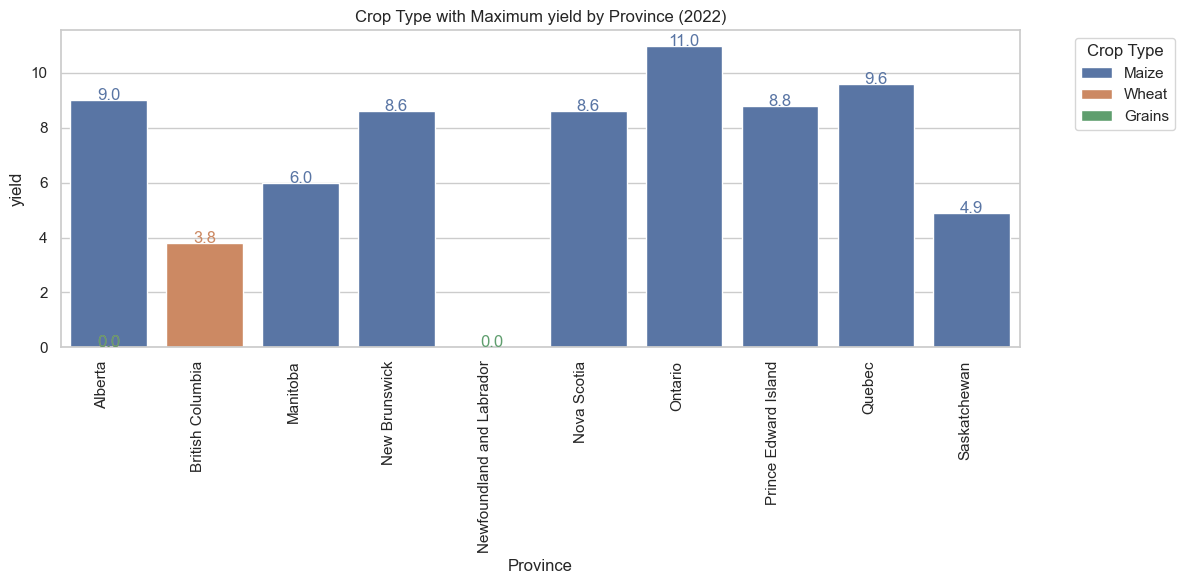

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Map crops to their crop types
agriculture_province_data['Croptype'] = agriculture_province_data['Crop'].map(crop_to_croptype)

# Filter the data for the year 2023
agriculture_2023 = agriculture_province_data[agriculture_province_data['Year'] == 2022]

# Group the data by province, croptype, and crop, then sum the yield for each crop type within each province
yield_by_croptype_province = agriculture_2023.groupby(['Province', 'Croptype', 'Crop'])['Yield'].sum().reset_index()

# Group by province and croptype, then find the maximum yield for each crop type within each province
max_yield_by_croptype_province = yield_by_croptype_province.groupby(['Province', 'Croptype'])['Yield'].max().reset_index()

# Find the crop type with the maximum production for each province
max_yield_croptype_by_province = max_yield_by_croptype_province.loc[max_yield_by_croptype_province.groupby('Province')['Yield'].idxmax()]

sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=max_yield_croptype_by_province, x='Province', y='Yield', hue='Croptype', dodge=False)
plt.title('Crop Type with Maximum yield by Province (2022)')
plt.xlabel('Province')
plt.ylabel('yield')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the numerical data on top with respect to its legend's color
for p in ax.patches:
    height = p.get_height()
    color = p.get_facecolor()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}', ha='center', color=color)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show plot
plt.tight_layout()
plt.show()


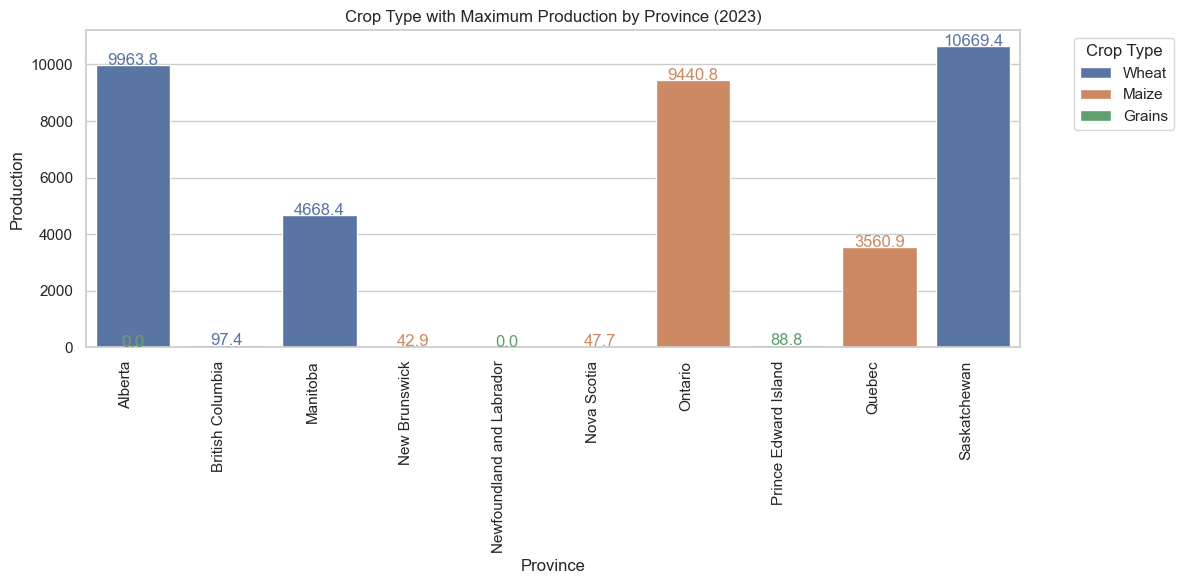

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Map crops to their crop types
agriculture_province_data['Croptype'] = agriculture_province_data['Crop'].map(crop_to_croptype)

# Filter the data for the year 2023
agriculture_2023 = agriculture_province_data[agriculture_province_data['Year'] == 2023]

# Group the data by province, croptype, and crop, then sum the production for each crop type within each province
production_by_croptype_province = agriculture_2023.groupby(['Province', 'Croptype', 'Crop'])['Production'].sum().reset_index()

# Group by province and croptype, then find the maximum production for each crop type within each province
max_production_by_croptype_province = production_by_croptype_province.groupby(['Province', 'Croptype'])['Production'].max().reset_index()

# Find the crop type with the maximum production for each province
max_production_croptype_by_province = max_production_by_croptype_province.loc[max_production_by_croptype_province.groupby('Province')['Production'].idxmax()]

sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=max_production_croptype_by_province, x='Province', y='Production', hue='Croptype', dodge=False)
plt.title('Crop Type with Maximum Production by Province (2023)')
plt.xlabel('Province')
plt.ylabel('Production')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the numerical data on top with respect to its legend's color
for p in ax.patches:
    height = p.get_height()
    color = p.get_facecolor()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}', ha='center', color=color)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show plot
plt.tight_layout()
plt.show()


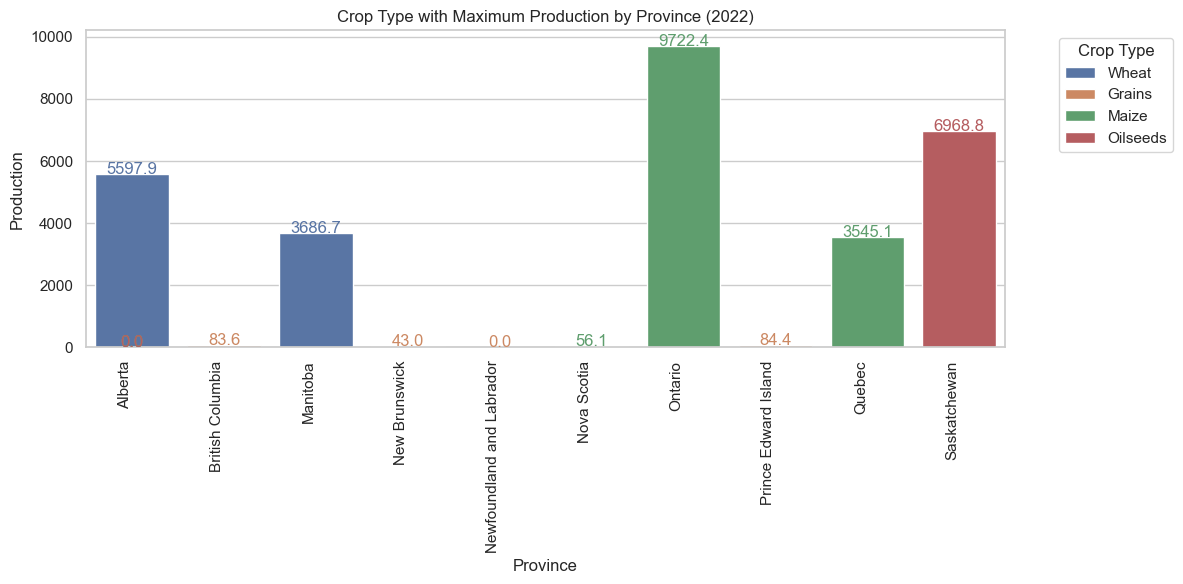

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a DataFrame called 'df'

# Map crops to their crop types
agriculture_province_data['Croptype'] = agriculture_province_data['Crop'].map(crop_to_croptype)

# Filter the data for the year 2023
agriculture_2023 = agriculture_province_data[agriculture_province_data['Year'] == 2022]

# Group the data by province, croptype, and crop, then sum the production for each crop type within each province
production_by_croptype_province = agriculture_2023.groupby(['Province', 'Croptype', 'Crop'])['Production'].sum().reset_index()

# Group by province and croptype, then find the maximum production for each crop type within each province
max_production_by_croptype_province = production_by_croptype_province.groupby(['Province', 'Croptype'])['Production'].max().reset_index()

# Find the crop type with the maximum production for each province
max_production_croptype_by_province = max_production_by_croptype_province.loc[max_production_by_croptype_province.groupby('Province')['Production'].idxmax()]

sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=max_production_croptype_by_province, x='Province', y='Production', hue='Croptype', dodge=False)
plt.title('Crop Type with Maximum Production by Province (2022)')
plt.xlabel('Province')
plt.ylabel('Production')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the numerical data on top with respect to its legend's color
for p in ax.patches:
    height = p.get_height()
    color = p.get_facecolor()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}', ha='center', color=color)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show plot
plt.tight_layout()
plt.show()


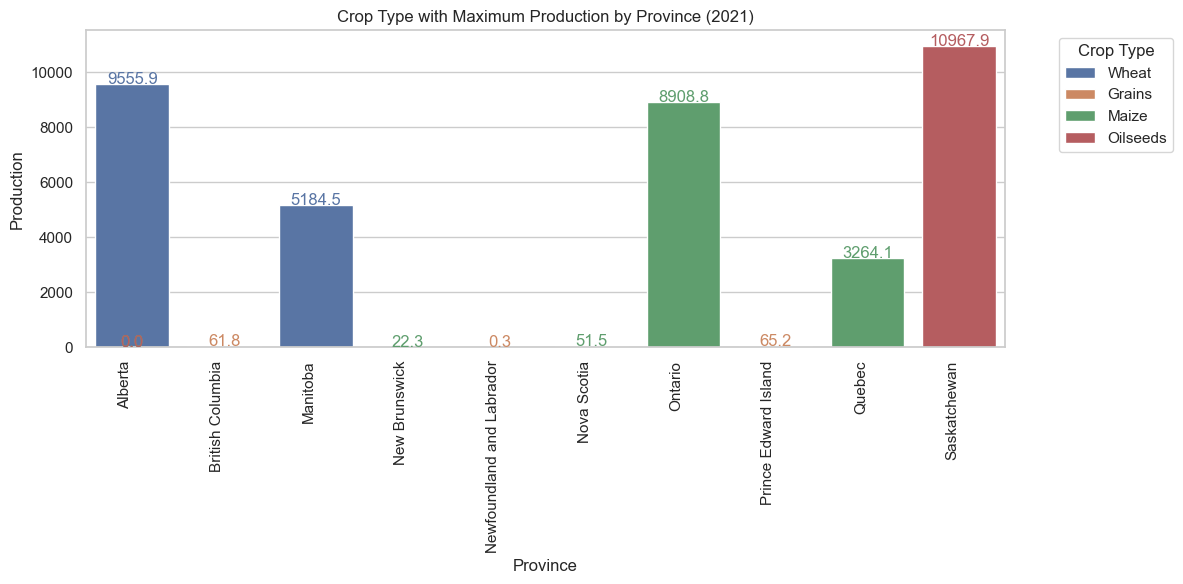

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a DataFrame called 'df'

# Map crops to their crop types
agriculture_province_data['Croptype'] = agriculture_province_data['Crop'].map(crop_to_croptype)

# Filter the data for the year 2023
agriculture_2023 = agriculture_province_data[agriculture_province_data['Year'] == 2021]

# Group the data by province, croptype, and crop, then sum the production for each crop type within each province
production_by_croptype_province = agriculture_2023.groupby(['Province', 'Croptype', 'Crop'])['Production'].sum().reset_index()

# Group by province and croptype, then find the maximum production for each crop type within each province
max_production_by_croptype_province = production_by_croptype_province.groupby(['Province', 'Croptype'])['Production'].max().reset_index()

# Find the crop type with the maximum production for each province
max_production_croptype_by_province = max_production_by_croptype_province.loc[max_production_by_croptype_province.groupby('Province')['Production'].idxmax()]

sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=max_production_croptype_by_province, x='Province', y='Production', hue='Croptype', dodge=False)
plt.title('Crop Type with Maximum Production by Province (2021)')
plt.xlabel('Province')
plt.ylabel('Production')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the numerical data on top with respect to its legend's color
for p in ax.patches:
    height = p.get_height()
    color = p.get_facecolor()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}', ha='center', color=color)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show plot
plt.tight_layout()
plt.show()


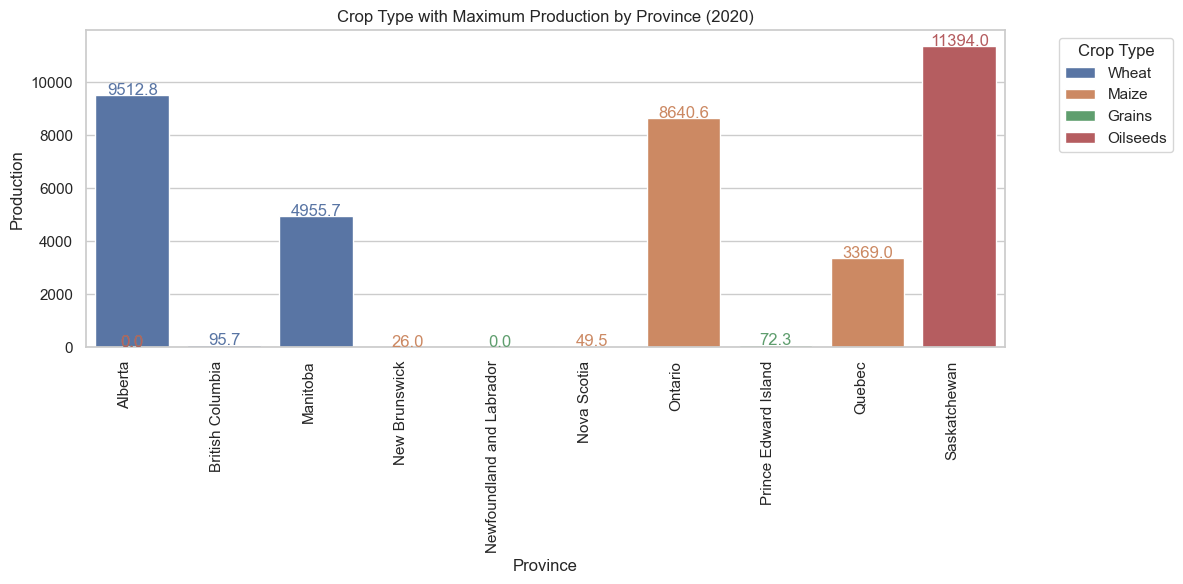

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a DataFrame called 'df'

# Map crops to their crop types
agriculture_province_data['Croptype'] = agriculture_province_data['Crop'].map(crop_to_croptype)

# Filter the data for the year 2023
agriculture_2023 = agriculture_province_data[agriculture_province_data['Year'] == 2020]

# Group the data by province, croptype, and crop, then sum the production for each crop type within each province
production_by_croptype_province = agriculture_2023.groupby(['Province', 'Croptype', 'Crop'])['Production'].sum().reset_index()

# Group by province and croptype, then find the maximum production for each crop type within each province
max_production_by_croptype_province = production_by_croptype_province.groupby(['Province', 'Croptype'])['Production'].max().reset_index()

# Find the crop type with the maximum production for each province
max_production_croptype_by_province = max_production_by_croptype_province.loc[max_production_by_croptype_province.groupby('Province')['Production'].idxmax()]

sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=max_production_croptype_by_province, x='Province', y='Production', hue='Croptype', dodge=False)
plt.title('Crop Type with Maximum Production by Province (2020)')
plt.xlabel('Province')
plt.ylabel('Production')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the numerical data on top with respect to its legend's color
for p in ax.patches:
    height = p.get_height()
    color = p.get_facecolor()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}', ha='center', color=color)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show plot
plt.tight_layout()
plt.show()


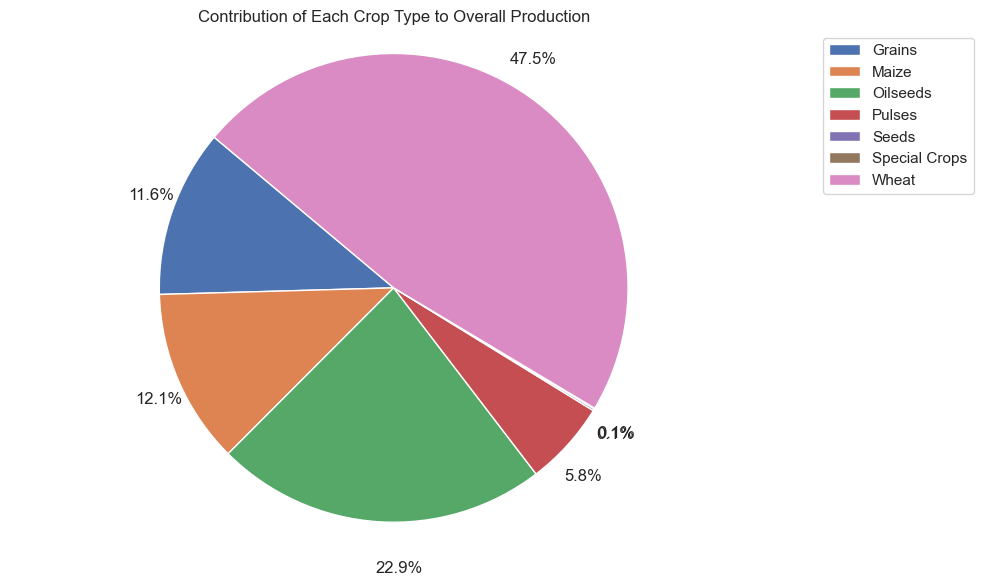

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is stored in a DataFrame called 'df'

# Map crops to their crop types
agriculture_province_data['Croptype'] = agriculture_province_data['Crop'].map(crop_to_croptype)

# Group the data by croptype and sum the production for each crop type across all provinces
production_by_croptype = agriculture_province_data.groupby('Croptype')['Production'].sum().reset_index()

# Calculate contribution percentage
total_production = production_by_croptype['Production'].sum()
production_by_croptype['Contribution (%)'] = (production_by_croptype['Production'] / total_production) * 100

# Plotting a pie chart
plt.figure(figsize=(10, 6))
wedges, labels = plt.pie(production_by_croptype['Production'], labels=None, startangle=140)

# Annotate percentages on the right side with legends
angles = np.linspace(0, 2 * np.pi, len(wedges), endpoint=False).tolist()
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    angle_mid = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = np.cos(np.radians(angle_mid)) * 1.2  # Position text slightly outside of the pie chart
    y = np.sin(np.radians(angle_mid)) * 1.2
    ha = 'right' if x > 0 else 'left'  # Align text based on position
    plt.text(x, y, f'{production_by_croptype["Contribution (%)"][i]:.1f}%', ha=ha, va='center')

plt.title('Contribution of Each Crop Type to Overall Production')

# Add legends
plt.legend(production_by_croptype['Croptype'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()


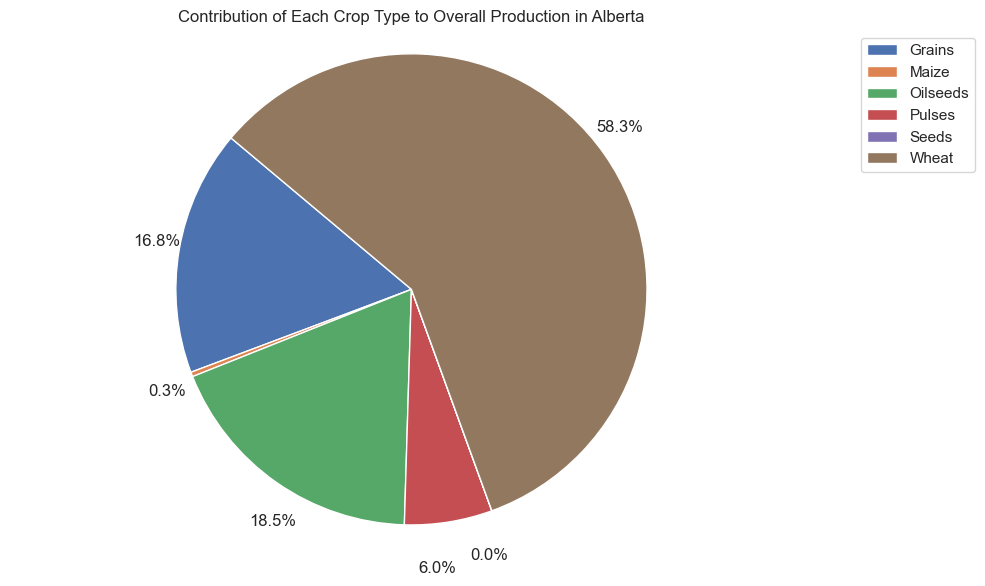

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming agriculture_province_data and crop_to_croptype are defined properly

# Filter the data for Alberta province and create a copy
alberta_data = agriculture_province_data[agriculture_province_data['Province'] == 'Alberta'].copy()

# Map crops to their crop types
alberta_data['Croptype'] = alberta_data['Crop'].map(crop_to_croptype)

# Group the data by croptype and sum the production for each crop type in Alberta
production_by_croptype_alberta = alberta_data.groupby('Croptype')['Production'].sum().reset_index()

# Calculate contribution percentage
total_production = production_by_croptype_alberta['Production'].sum()
production_by_croptype_alberta['Contribution (%)'] = (production_by_croptype_alberta['Production'] / total_production) * 100

# Plotting a pie chart for Alberta province
plt.figure(figsize=(10, 6))
wedges, labels = plt.pie(production_by_croptype_alberta['Production'], labels=None, startangle=140)

# Annotate percentages on the right side with legends
angles = np.linspace(0, 2 * np.pi, len(wedges), endpoint=False).tolist()
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    angle_mid = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = np.cos(np.radians(angle_mid)) * 1.2  # Position text slightly outside of the pie chart
    y = np.sin(np.radians(angle_mid)) * 1.2
    ha = 'right' if x > 0 else 'left'  # Align text based on position
    plt.text(x, y, f'{production_by_croptype_alberta["Contribution (%)"][i]:.1f}%', ha=ha, va='center')

plt.title('Contribution of Each Crop Type to Overall Production in Alberta')

# Add legends
plt.legend(production_by_croptype_alberta['Croptype'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()


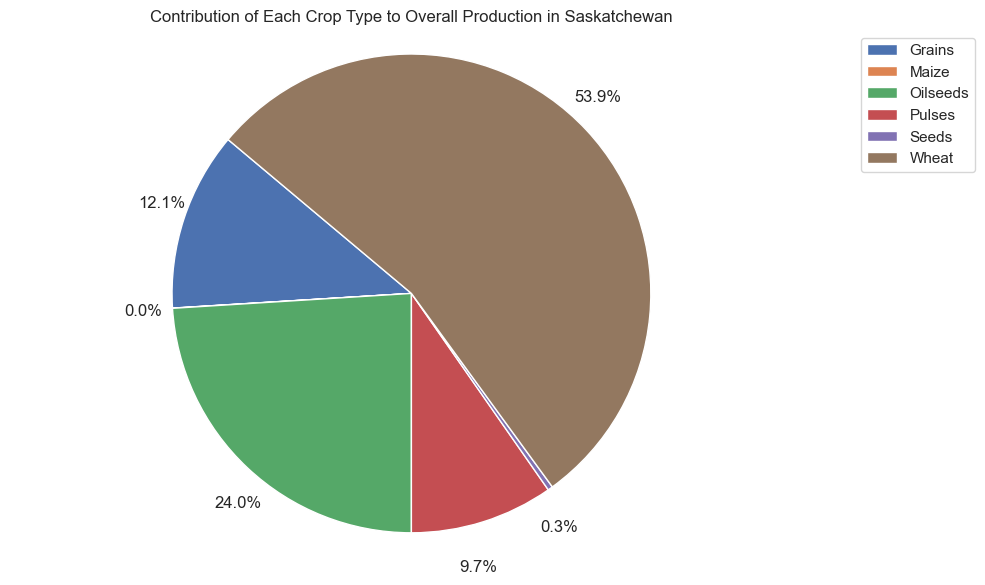

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming agriculture_province_data and crop_to_croptype are defined properly

# Filter the data for Alberta province and create a copy
alberta_data = agriculture_province_data[agriculture_province_data['Province'] == 'Saskatchewan'].copy()

# Map crops to their crop types
alberta_data['Croptype'] = alberta_data['Crop'].map(crop_to_croptype)

# Group the data by croptype and sum the production for each crop type in Alberta
production_by_croptype_alberta = alberta_data.groupby('Croptype')['Production'].sum().reset_index()

# Calculate contribution percentage
total_production = production_by_croptype_alberta['Production'].sum()
production_by_croptype_alberta['Contribution (%)'] = (production_by_croptype_alberta['Production'] / total_production) * 100

# Plotting a pie chart for Alberta province
plt.figure(figsize=(10, 6))
wedges, labels = plt.pie(production_by_croptype_alberta['Production'], labels=None, startangle=140)

# Annotate percentages on the right side with legends
angles = np.linspace(0, 2 * np.pi, len(wedges), endpoint=False).tolist()
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    angle_mid = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = np.cos(np.radians(angle_mid)) * 1.2  # Position text slightly outside of the pie chart
    y = np.sin(np.radians(angle_mid)) * 1.2
    ha = 'right' if x > 0 else 'left'  # Align text based on position
    plt.text(x, y, f'{production_by_croptype_alberta["Contribution (%)"][i]:.1f}%', ha=ha, va='center')

plt.title('Contribution of Each Crop Type to Overall Production in Saskatchewan')

# Add legends
plt.legend(production_by_croptype_alberta['Croptype'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()


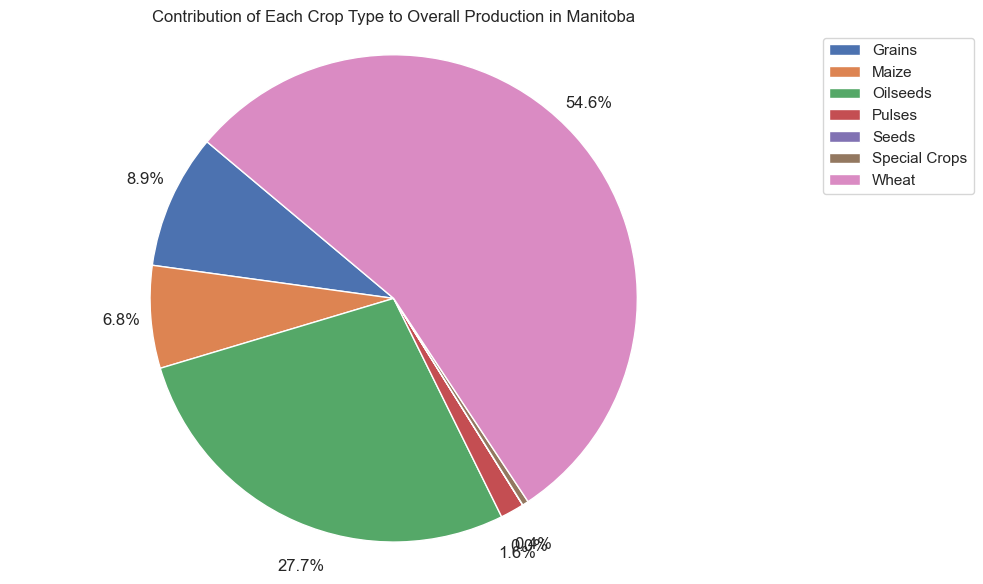

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming agriculture_province_data and crop_to_croptype are defined properly

# Filter the data for Alberta province and create a copy
alberta_data = agriculture_province_data[agriculture_province_data['Province'] == 'Manitoba'].copy()

# Map crops to their crop types
alberta_data['Croptype'] = alberta_data['Crop'].map(crop_to_croptype)

# Group the data by croptype and sum the production for each crop type in Alberta
production_by_croptype_alberta = alberta_data.groupby('Croptype')['Production'].sum().reset_index()

# Calculate contribution percentage
total_production = production_by_croptype_alberta['Production'].sum()
production_by_croptype_alberta['Contribution (%)'] = (production_by_croptype_alberta['Production'] / total_production) * 100

# Plotting a pie chart for Alberta province
plt.figure(figsize=(10, 6))
wedges, labels = plt.pie(production_by_croptype_alberta['Production'], labels=None, startangle=140)

# Annotate percentages on the right side with legends
angles = np.linspace(0, 2 * np.pi, len(wedges), endpoint=False).tolist()
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    angle_mid = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = np.cos(np.radians(angle_mid)) * 1.2  # Position text slightly outside of the pie chart
    y = np.sin(np.radians(angle_mid)) * 1.2
    ha = 'right' if x > 0 else 'left'  # Align text based on position
    plt.text(x, y, f'{production_by_croptype_alberta["Contribution (%)"][i]:.1f}%', ha=ha, va='center')

plt.title('Contribution of Each Crop Type to Overall Production in Manitoba')

# Add legends
plt.legend(production_by_croptype_alberta['Croptype'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()


As evident from visual analysis, the production is very low in "Newfoundland and labrador" province. So let's develop a model that make prediction of production for the user desired province and seeded area for the desired crop. Also we would like to consider only 9 provinces for developing the model

We are removing the uncessary columns like year, Harvested area, and yield

In [105]:
df1=df

In [106]:
df1.shape

(2490, 7)

In [107]:
df2=df1.drop(columns=['Year', 'Harvested Area'],axis=1)

In [108]:
df2.head()

Crop Province  Seeded Area  Yield  Production
0  Winter Wheat  Alberta         72.8    4.6       288.5
1  Winter Wheat  Alberta         85.0    4.0       296.1
2  Winter Wheat  Alberta         72.8    3.5       225.9
3  Winter Wheat  Alberta         78.5    4.4       318.4
4  Winter Wheat  Alberta         52.6    4.2       176.9

In [109]:
#removig all the records for the "Newfoundland and Labrador" province
df3 = df2[df2['Province'] != 'Newfoundland and Labrador']

In [110]:
df1=df3

In [111]:
df1.shape

(2250, 5)

In [29]:
# Remove the specified columns
##columns_to_drop = ['Year', 'Harvested Area',]
##df_filtered = df3.drop(columns=columns_to_drop)

In [30]:
##df1=df_filtered

In [112]:
df1.head()

Crop Province  Seeded Area  Yield  Production
0  Winter Wheat  Alberta         72.8    4.6       288.5
1  Winter Wheat  Alberta         85.0    4.0       296.1
2  Winter Wheat  Alberta         72.8    3.5       225.9
3  Winter Wheat  Alberta         78.5    4.4       318.4
4  Winter Wheat  Alberta         52.6    4.2       176.9

In [113]:
df1.shape

(2250, 5)

In [114]:
##Creating dummies

In [115]:
df_final = pd.get_dummies(df1, dtype=int)
df_final

Seeded Area  Yield  Production  Crop_Barley  Crop_CW Extra Strong  \
0            72.8    4.6       288.5            0                     0   
1            85.0    4.0       296.1            0                     0   
2            72.8    3.5       225.9            0                     0   
3            78.5    4.4       318.4            0                     0   
4            52.6    4.2       176.9            0                     0   
5            38.4    3.8       100.4            0                     0   
6            40.5    3.3       103.1            0                     0   
7            49.5    4.4       160.4            0                     0   
8            82.8    2.8       178.0            0                     0   
9            61.5    4.0       185.1            0                     0   
10         2606.2    3.9     10169.6            0                     0   
11         2466.6    3.5      8369.1            0                     0   
12         2391.7    3.2      7247.6            0                     0   
13         2318.3    4.0      8204.4            0                     0   
14         2371.5    3.7      8720.0            0                     0   
15         2535.2    3.5      8771.6            0                     0   
16         2665.9    3.7      9512.8            0                     0   
17         2555.2    3.8      9555.9            0                     0   
18         2310.7    2.5      5597.9            0                     0   
19         2588.3    3.9      9963.8            0                     0   
20         2155.0    3.7      7955.1            0                     0   
21         2043.7    3.3      6635.1            0                     0   
22         1962.7    3.0      5715.3            0                     0   
23         1847.4    3.7      6123.5            0                     0   
24         2013.3    3.6      7220.3            0                     0   
25         2037.6    3.4      6789.1            0                     0   
26         2237.4    3.6      7772.4            0                     0   
27         2083.4    3.8      7681.4            0                     0   
28         1867.3    2.4      4383.2            0                     0   
29         2057.7    3.8      7689.2            0                     0   
30          257.0    5.0      1275.6            0                     0   
31          275.2    4.2      1142.0            0                     0   
32          273.2    3.8      1020.6            0                     0   
33          299.5    5.0      1387.4            0                     0   
34          218.5    4.6       977.0            0                     0   
35          279.1    4.5      1230.4            0                     0   
36          275.3    4.5      1160.5            0                     0   
37          308.1    4.1      1231.1            0                     0   
38          285.5    3.2       895.1            0                     0   
39          308.1    4.7      1447.8            0                     0   
40            0.0    0.0         0.0            0                     0   
41            0.0    0.0         0.0            0                     0   
42            0.0    0.0         0.0            0                     0   
43            0.0    0.0         0.0            0                     0   
44            0.0    0.0         0.0            0                     0   
45          129.1    3.4       432.4            0                     0   
46            0.0    0.0         0.0            0                     0   
47           37.2    3.6       131.5            0                     0   
48           41.3    2.4        98.6            0                     0   
49          102.6    3.7       372.4            0                     0   
50           26.3    5.0       130.6            0                     1   
51            6.1    4.2        25.9            0                     1   
52           24.3    3.9       

In [116]:
df_final.columns

Index(['Seeded Area', 'Yield', 'Production', 'Crop_Barley',
       'Crop_CW Extra Strong', 'Crop_CW Red Spring',
       'Crop_CW Soft White Spring', 'Crop_Canada Prairie Spring',
       'Crop_Canary Seed', 'Crop_Canola', 'Crop_Chickpeas',
       'Crop_Coloured Beans', 'Crop_Corn', 'Crop_Dry Peas',
       'Crop_Dry White Beans', 'Crop_Durum', 'Crop_Flaxseed', 'Crop_Lentils',
       'Crop_Mixed Grains', 'Crop_Mustard Seed', 'Crop_Northern Hard Red',
       'Crop_Oats', 'Crop_Other Spring Wheat', 'Crop_Rye', 'Crop_Soybeans',
       'Crop_Special Crops', 'Crop_Spring Wheat', 'Crop_Sunflower Seed',
       'Crop_Winter Wheat', 'Province_Alberta', 'Province_British Columbia',
       'Province_Manitoba', 'Province_New Brunswick', 'Province_Nova Scotia',
       'Province_Ontario', 'Province_Prince Edward Island', 'Province_Quebec',
       'Province_Saskatchewan'],
      dtype='object')

In [117]:
df_final=df_final.set_axis(['Seeded_Area', 'Yield', 'Production', 'Crop_Barley',
       'Crop_CW_Extra_Strong', 'Crop_CW_Red_Spring',
       'Crop_CW_Soft_White_Spring','Crop_Canada_Prairie_Spring',
       'Crop_Canary_Seed', 'Crop_Canola',
       'Crop_Chickpeas', 'Crop_Coloured_Beans', 'Crop_Corn', 'Crop_Dry_Peas',
       'Crop_Dry_White_Beans', 'Crop_Durum', 'Crop_Flaxseed', 'Crop_Lentils',
       'Crop_Mixed_Grains', 'Crop_Mustard_Seed', 'Crop_Northern_Hard_Red',
       'Crop_Oats', 'Crop_Other_Spring_Wheat', 'Crop_Rye', 'Crop_Soybeans',
       'Crop_Special_Crops', 'Crop_Spring_Wheat', 'Crop_Sunflower_Seed',
       'Crop_Winter_Wheat', 'Province_Alberta', 'Province_British_Columbia',
       'Province_Manitoba', 'Province_New_Brunswick','Province_Nova_Scotia',
       'Province_Ontario', 'Province_Prince_Edward_Island', 'Province_Quebec',
       'Province_Saskatchewan'], axis=1)

In [118]:
df_final.columns

Index(['Seeded_Area', 'Yield', 'Production', 'Crop_Barley',
       'Crop_CW_Extra_Strong', 'Crop_CW_Red_Spring',
       'Crop_CW_Soft_White_Spring', 'Crop_Canada_Prairie_Spring',
       'Crop_Canary_Seed', 'Crop_Canola', 'Crop_Chickpeas',
       'Crop_Coloured_Beans', 'Crop_Corn', 'Crop_Dry_Peas',
       'Crop_Dry_White_Beans', 'Crop_Durum', 'Crop_Flaxseed', 'Crop_Lentils',
       'Crop_Mixed_Grains', 'Crop_Mustard_Seed', 'Crop_Northern_Hard_Red',
       'Crop_Oats', 'Crop_Other_Spring_Wheat', 'Crop_Rye', 'Crop_Soybeans',
       'Crop_Special_Crops', 'Crop_Spring_Wheat', 'Crop_Sunflower_Seed',
       'Crop_Winter_Wheat', 'Province_Alberta', 'Province_British_Columbia',
       'Province_Manitoba', 'Province_New_Brunswick', 'Province_Nova_Scotia',
       'Province_Ontario', 'Province_Prince_Edward_Island', 'Province_Quebec',
       'Province_Saskatchewan'],
      dtype='object')

In [119]:
data=df_final.copy()

In [120]:
x = df_final.drop('Production',axis=1)
y = df_final['Production']

In [121]:
x.head()

Seeded_Area  Yield  Crop_Barley  Crop_CW_Extra_Strong  Crop_CW_Red_Spring  \
0         72.8    4.6            0                     0                   0   
1         85.0    4.0            0                     0                   0   
2         72.8    3.5            0                     0                   0   
3         78.5    4.4            0                     0                   0   
4         52.6    4.2            0                     0                   0   

   Crop_CW_Soft_White_Spring  Crop_Canada_Prairie_Spring  Crop_Canary_Seed  \
0                          0                           0                 0   
1                          0                           0                 0   
2                          0                           0                 0   
3                          0                           0                 0   
4                          0                           0                 0   

   Crop_Canola  Crop_Chickpeas  Crop_Coloured_Beans  Crop_Corn  Crop_Dry_Peas  \
0            0               0                    0          0              0   
1            0               0                    0          0              0   
2            0               0                    0          0              0   
3            0               0                    0          0              0   
4            0               0                    0          0              0   

   Crop_Dry_White_Beans  Crop_Durum  Crop_Flaxseed  Crop_Lentils  \
0                     0           0              0             0   
1                     0           0              0             0   
2                     0           0              0             0   
3                     0           0              0             0   
4                     0           0              0             0   

   Crop_Mixed_Grains  Crop_Mustard_Seed  Crop_Northern_Hard_Red  Crop_Oats  \
0                  0                  0                       0          0   
1                  0                  0                       0          0   
2                  0                  0                       0          0   
3                  0                  0                       0          0   
4                  0                  0                       0          0   

   Crop_Other_Spring_Wheat  Crop_Rye  Crop_Soybeans  Crop_Special_Crops  \
0                        0         0              0                   0   
1                        0         0              0                   0   
2                        0         0              0                   0   
3                        0         0              0                   0   
4                        0         0              0                   0   

   Crop_Spring_Wheat  Crop_Sunflower_Seed  Crop_Winter_Wheat  \
0                  0                    0                  1   
1                  0                    0                  1   
2                  0                    0                  1   
3                  0                    0                  1   
4                  0                    0                  1   

   Province_Alberta  Province_British_Columbia  Province_Manitoba  \
0                 1                          0                  0   
1                 1                          0                  0   
2                 1                          0                  0   
3                 1                          0                  0   
4                 1                          0                  0   

   Province_New_Brunswick  Province_Nova_Scotia  Province_Ontario  \
0                       0                     0                 0   
1                       0                     0                 0   
2                       0                     0                 0   
3                       0                     0                 0   
4                       0                     0                 0   

   Province_Prince_Edw

In [122]:
x.columns

Index(['Seeded_Area', 'Yield', 'Crop_Barley', 'Crop_CW_Extra_Strong',
       'Crop_CW_Red_Spring', 'Crop_CW_Soft_White_Spring',
       'Crop_Canada_Prairie_Spring', 'Crop_Canary_Seed', 'Crop_Canola',
       'Crop_Chickpeas', 'Crop_Coloured_Beans', 'Crop_Corn', 'Crop_Dry_Peas',
       'Crop_Dry_White_Beans', 'Crop_Durum', 'Crop_Flaxseed', 'Crop_Lentils',
       'Crop_Mixed_Grains', 'Crop_Mustard_Seed', 'Crop_Northern_Hard_Red',
       'Crop_Oats', 'Crop_Other_Spring_Wheat', 'Crop_Rye', 'Crop_Soybeans',
       'Crop_Special_Crops', 'Crop_Spring_Wheat', 'Crop_Sunflower_Seed',
       'Crop_Winter_Wheat', 'Province_Alberta', 'Province_British_Columbia',
       'Province_Manitoba', 'Province_New_Brunswick', 'Province_Nova_Scotia',
       'Province_Ontario', 'Province_Prince_Edward_Island', 'Province_Quebec',
       'Province_Saskatchewan'],
      dtype='object')

In [123]:
y.head()

0    288.5
1    296.1
2    225.9
3    318.4
4    176.9
Name: Production, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
regressor=RandomForestRegressor()

In [46]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [49]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [50]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [51]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2,
                                random_state=42, n_jobs = 1)

In [52]:
rf_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

D:\ML\envs\cropanalysis\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\ML\envs\cropanalysis\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ML\envs\cropanalysis\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\ML\envs\cropanalysis\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\ML\envs\cropanalysis\lib\site-packages\sklea

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [53]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [54]:
rf_random.best_score_

-39061.23121881189

In [55]:
predictions=rf_random.predict(xtest)

C:\Users\USER\AppData\Local\Temp\ipykernel_26596\73924684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytest-predictions)


<Axes: xlabel='Production', ylabel='Density'>

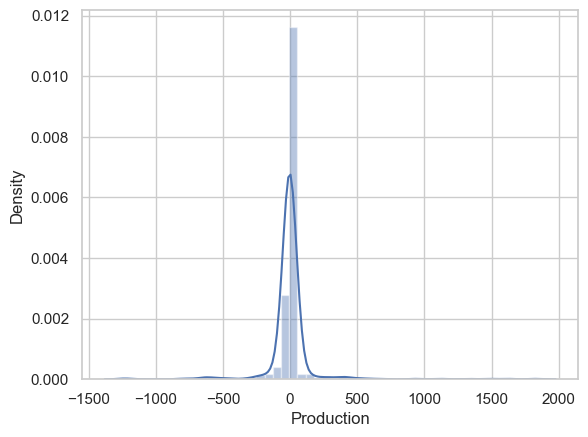

In [56]:

sns.distplot(ytest-predictions)

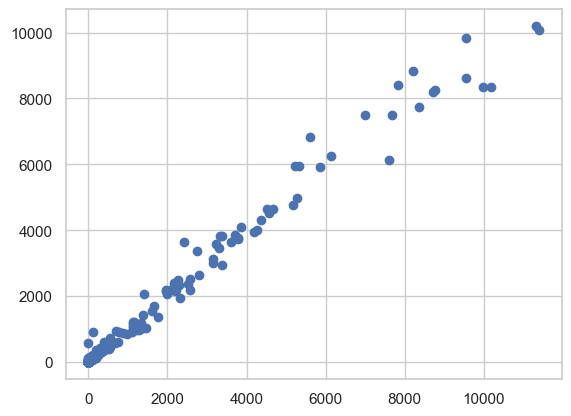

In [57]:
plt.scatter(ytest,predictions)

In [58]:
from sklearn import metrics 

In [59]:
print('MAE:', metrics.mean_absolute_error(ytest, predictions))
print('MSE:', metrics.mean_squared_error(ytest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictions)))

MAE: 50.98372459677462
MSE: 33956.09825075179
RMSE: 184.27180536032037


In [60]:
from sklearn.metrics import r2_score
r2_score(ytest,predictions)

0.9858667021234789

In [61]:
import pickle
# open a file, where you ant to store the data
file = open('crop_random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)